In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [7]:
os.chdir('//../Big_Foot/CNN_Model2/ALL PROJECT IMAGES/')
if os.path.isdir('train/bigfoot') is False:
    os.makedirs('train/bigfoot')
    os.makedirs('train/man')
    os.makedirs('valid/bigfoot')
    os.makedirs('valid/man')
    os.makedirs('test/bigfoot')
    os.makedirs('test/man')
    
    for c in random.sample(glob.glob('bigfoot*'), 400):
        shutil.move(c, 'train/bigfoot')
    for c in random.sample(glob.glob('man*'), 400):
        shutil.move(c, 'train/man')
    for c in random.sample(glob.glob('bigfoot*'), 125):
        shutil.move(c, 'valid/bigfoot')
    for c in random.sample(glob.glob('man*'), 125):
        shutil.move(c, 'valid/man')
    for c in random.sample(glob.glob('bigfoot*'), 60):
        shutil.move(c, 'test/bigfoot')
    for c in random.sample(glob.glob('man*'), 60):
        shutil.move(c, 'test/man')
os.chdir('//../../../../../../../')

In [8]:
train_path ='//.../Big_Foot/CNN_Model2/train'
valid_path ='//.../Big_Foot/CNN_Model2/valid'
test_path = '//.../Big_Foot/CNN_Model2/test'

In [9]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes= ['bigfoot','man'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes= ['bigfoot','man'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes= ['bigfoot','man'], batch_size=10, shuffle=False)


Found 800 images belonging to 2 classes.
Found 250 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [10]:
assert train_batches.n == 800
assert valid_batches.n == 250
assert test_batches.n == 120
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [11]:
imgs, labels = next(train_batches)

In [12]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1,10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

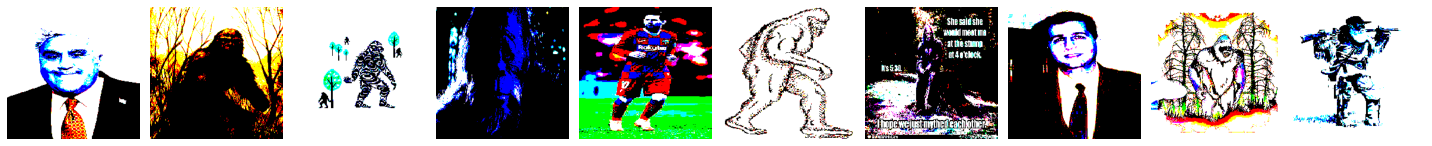

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [13]:
plotImages(imgs)
print(labels)

In [14]:
model = Sequential ([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(224,224,3)), 
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'), 
    MaxPool2D(pool_size=(2,2), strides=2), 
    Flatten(), 
    Dense(units=2, activation='softmax'),
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

In [16]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
80/80 - 61s - loss: 18.6447 - acc: 0.6950 - val_loss: 8.4297 - val_acc: 0.7160
Epoch 2/10
80/80 - 60s - loss: 2.2880 - acc: 0.8625 - val_loss: 4.5611 - val_acc: 0.7520
Epoch 3/10
80/80 - 49s - loss: 0.8296 - acc: 0.9237 - val_loss: 6.4940 - val_acc: 0.7760
Epoch 4/10
80/80 - 51s - loss: 0.6516 - acc: 0.9287 - val_loss: 3.4710 - val_acc: 0.7800
Epoch 5/10
80/80 - 44s - loss: 0.3454 - acc: 0.9613 - val_loss: 4.5315 - val_acc: 0.7560
Epoch 6/10
80/80 - 45s - loss: 0.3575 - acc: 0.9513 - val_loss: 3.1919 - val_acc: 0.7960
Epoch 7/10
80/80 - 49s - loss: 0.0380 - acc: 0.9925 - val_loss: 3.6584 - val_acc: 0.8160
Epoch 8/10
80/80 - 47s - loss: 0.0034 - acc: 0.9975 - val_loss: 3.5569 - val_acc: 0.8160
Epoch 9/10
80/80 - 27s - loss: 0.0344 - acc: 0.9925 - val_loss: 2.9087 - val_acc: 0.8040
Epoch 10/10
80/80 - 29s - loss: 3.5014e-05 - acc: 1.0000 - val_loss: 3.1817 - val_acc: 0.8320


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

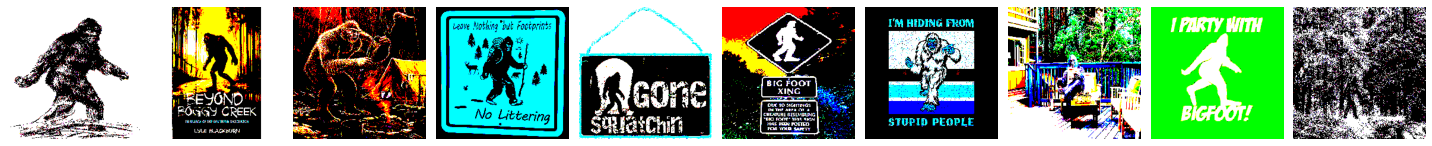

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [18]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [19]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [20]:
predictions = model.predict(x=test_batches, verbose=0)

In [21]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [22]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [23]:
def plot_confusion_matrix(cm, classes, 
                         normalize=False, 
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks= np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/ cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix Without Normalization')
    
    print(cm)
    
    thresh = cm.max() /2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
                horizontalalignment="center",
                color="white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

In [24]:
test_batches.class_indices

{'bigfoot': 0, 'man': 1}

Confusion Matrix Without Normalization
[[56  4]
 [15 45]]


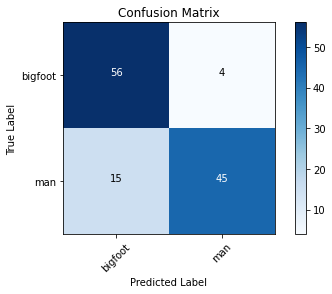

In [25]:
cm_plot_labels = ['bigfoot', 'man']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')